In [2]:
import pandas as pd

# Define the column names based on the attribute information
columns = [
    "class",  # Target column: edible (e) or poisonous (p)
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises?",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

# Load the dataset and assign column names
data = pd.read_csv("agaricus-lepiota.csv", header=None, names=columns)

# Display the first few rows of the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn.model_selection import train_test_split

# Split the features and target variable
x = data.drop("class", axis=1)  # Features (all columns except the target)
y = data["class"]              # Target (the 'class' column)

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (6499, 22)
Training Target Shape: (6499,)
Testing Features Shape: (1625, 22)
Testing Target Shape: (1625,)


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encode the features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Create the encoder
X_train_encoded = onehot_encoder.fit_transform(X_train)               # Fit and transform the training features
X_test_encoded = onehot_encoder.transform(X_test)                     # Transform the testing features

# Label Encode the responses
label_encoder = LabelEncoder()                   # Create the encoder
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform the training target
y_test_encoded = label_encoder.transform(y_test)        # Transform the testing target


# Display the shapes of encoded data
print("Encoded Training Features Shape:", X_train_encoded.shape)
print("Encoded Testing Features Shape:", X_test_encoded.shape)
print("Encoded Training Target Shape:", y_train_encoded.shape)
print("Encoded Testing Target Shape:", y_test_encoded.shape)

Encoded Training Features Shape: (6499, 116)
Encoded Testing Features Shape: (1625, 116)
Encoded Training Target Shape: (6499,)
Encoded Testing Target Shape: (1625,)


c:\Users\White Steed\Anaconda\envs\dtsc680\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input dimension (number of features in the encoded data)
input_dim = X_train_encoded.shape[1]

# Create the sequential model
model = Sequential()

# Input layer with ReLU activation
model.add(Dense(units=16, activation='relu', input_dim=input_dim))

# Output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and an optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1872      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [6]:
%%time

# Train the model using the training data
history = model.fit(X_train_encoded, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_encoded, y_test_encoded))

Epoch 1/20
204/204 [==============================] - 0s 947us/step - loss: 0.2795 - accuracy: 0.9134 - val_loss: 0.0829 - val_accuracy: 0.9846
Epoch 2/20
204/204 [==============================] - 0s 602us/step - loss: 0.0473 - accuracy: 0.9922 - val_loss: 0.0298 - val_accuracy: 0.9957
Epoch 3/20
204/204 [==============================] - 0s 589us/step - loss: 0.0194 - accuracy: 0.9982 - val_loss: 0.0155 - val_accuracy: 0.9969
Epoch 4/20
204/204 [==============================] - 0s 599us/step - loss: 0.0103 - accuracy: 0.9992 - val_loss: 0.0093 - val_accuracy: 0.9982
Epoch 5/20
204/204 [==============================] - 0s 605us/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0059 - val_accuracy: 0.9988
Epoch 6/20
204/204 [==============================] - 0s 599us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9988
Epoch 7/20
204/204 [==============================] - 0s 602us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy:

51/51 [==============================] - 0s 364us/step


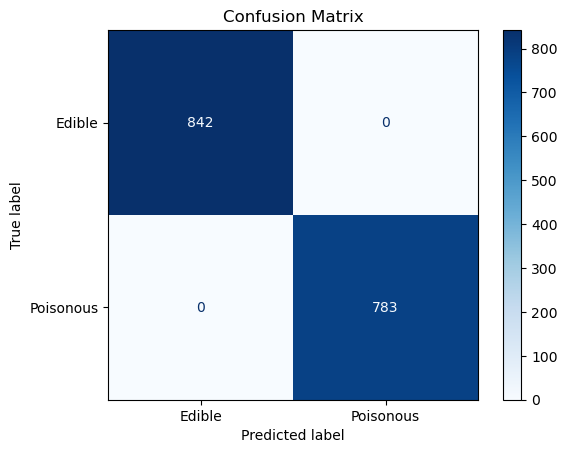

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set using the trained model
y_pred = (model.predict(X_test_encoded) > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Performing PCA:**
- Performing PCA will reduce the number of features the model needs to train on

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Apply PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the new shape of the training data after PCA
print(f"Original feature count: {X_train_encoded.shape[1]}")
print(f"Reduced feature count after PCA: {X_train_pca.shape[1]}")


Original feature count: 116
Reduced feature count after PCA: 60


**Creating a new Neural Network**

In [9]:
# Define the input dimension (number of PCA components)
input_dim_pca = X_train_pca.shape[1]

# Create a new sequential model for PCA data
pca_model = Sequential()

# Input layer with ReLU activation
pca_model.add(Dense(units=16, activation='relu', input_dim=input_dim_pca))

# Output layer with sigmoid activation for binary classification
pca_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the PCA Model**

In [10]:
%%time 

# Train the model using the PCA-transformed data
history_pca = pca_model.fit(X_train_pca, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test_encoded))

Epoch 1/20
204/204 [==============================] - 0s 931us/step - loss: 0.2773 - accuracy: 0.9418 - val_loss: 0.0897 - val_accuracy: 0.9969
Epoch 2/20
204/204 [==============================] - 0s 687us/step - loss: 0.0503 - accuracy: 0.9983 - val_loss: 0.0274 - val_accuracy: 0.9988
Epoch 3/20
204/204 [==============================] - 0s 610us/step - loss: 0.0178 - accuracy: 0.9998 - val_loss: 0.0142 - val_accuracy: 0.9988
Epoch 4/20
204/204 [==============================] - 0s 606us/step - loss: 0.0092 - accuracy: 0.9998 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 5/20
204/204 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 0.9998 - val_loss: 0.0074 - val_accuracy: 0.9988
Epoch 6/20
204/204 [==============================] - 0s 587us/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.0060 - val_accuracy: 0.9988
Epoch 7/20
204/204 [==============================] - 0s 604us/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.0052 - val_accuracy:

51/51 [==============================] - 0s 376us/step


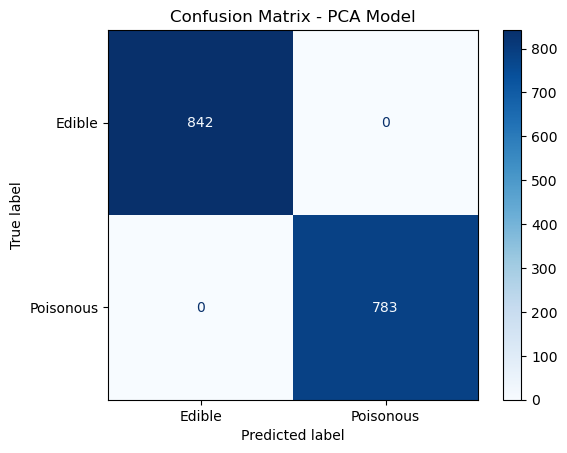

In [ ]:
# Predict on the PCA-transformed test set
y_pred_pca = (pca_model.predict(X_test_pca) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Compute the confusion matrix
cm_pca = confusion_matrix(y_test_encoded, y_pred_pca)

# Display the confusion matrix
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=['Edible', 'Poisonous'])
disp_pca.plot(cmap=plt.cm.Blues)

# Set title and show plot
plt.title("Confusion Matrix - PCA Model")
plt.show()

This is to test 